# Stroke Prediction Dataset

Link para acessar as informações sobre os dados [aqui](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

## Objetivo
Tenho como intuito realizar uma breve exploração e visualização dos dados, para em seguida dar início ao pré-processamento, selecionar os melhores parâmetros para cada modelo e dar início ao treinamento dos modelos, para enfim testar os melhores modelos e dizer ao final qual o modelo que melhor se adaptou a esses dados.

Os modelos que serão testados e treinados serão:

- Decision Tree
- Random Forest
- KNN
- Regressão Logística
- SVM

## Explicação das variáveis desse conjunto de dados

1. id: identificador único (será retirado do banco de dados por não servir de nada nessa análise)
2. gender: pode ser "masculino", "feminino" ou "outros"
3. age: idade do paciente
4. hypertension: 0 se o paciente não tem hipertensão e 1 se o paciente tem hipertensão
5. heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca e 1 se o paciente tiver alguma doença cardíaca
6. ever_married: se já foi casado ou não
7. work_type: tipo de emprego
8. Residence_type: zona rural ou zona urbana
9. avg_glucose_level: nível médio de glicose no sangue
10. bmi: índice de massa corporal (IMC)
11. smoking_status: paara saber se o paciente é um fumante, se é um ex-fumante, se nunca fumou ou "desconhecido"
12. stroke: 1 se o paciente teve AVC e 0 se o paciente não teve AVC

**Observação**: "desconhecido" na variável *smoke_status* significa que essa informação não está disponível para este paciente.

# Importação das bibliotecas principais

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Carregando os dados

In [110]:
df = pd.read_csv('C:/Users/jeffe/Documents/healthcare-dataset-stroke-data.csv')

# Exploração dos dados

In [111]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


📌 Retirarei a coluna `id` por não ter importância alguma no contexto desta análise

In [112]:
# retirando a coluna 'id'
df = df.drop(columns = ['id'])

## Verificando algumas estatísticas das variáveis quantitativas

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# verificando se há alguma variável com dados faltantes
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

📌 Notamos que a variável bmi (IMC) possui 201 dados faltantes (missing). Trataremos disso preenchendo onde existe `missing` com a mediana dessa variável.

In [8]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [113]:
## substituir o missing pela mediana da variável (28.1)
df['bmi'].fillna(df['bmi'].median(), inplace  = True)

In [10]:
# verificando que não há mais valores faltantes
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# as 10 primeiras linhas do conjunto de dados
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [12]:
# as 10 ultimas linhas do conjunto de dados
df.tail(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Vamos dar uma olhada no balanceamento dos dados quanto a nossa variável interesse (stroke).

In [13]:
np.unique(df['stroke'], return_counts = True)

(array([0, 1], dtype=int64), array([4861,  249], dtype=int64))

📌 Isso nos retornou a informação de que temos 4861 indivíduos classificados como 0 (não teve AVC) e apenas 249 indivíduos classificados como 1 (teve AVC). Falarei sobre isso em seguida.

# Visualização dos dados

<AxesSubplot:xlabel='stroke', ylabel='count'>

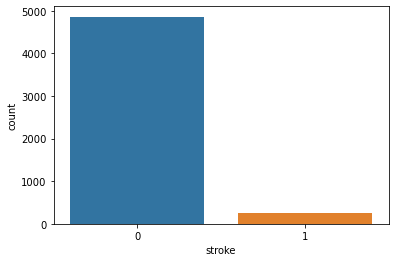

In [14]:
sns.countplot(x = df['stroke'])

📌 Aqui vemos claramente que os dados estão desbalanceados, isso prejudicaria na análise dos modelos, pois eles `"chutariam"` que quase todos os indivíduos são `0`, isso faria com que errassem bastante em classificar alguém como `1`. Trataremos disso mais na frente, lá no pré-processamento.

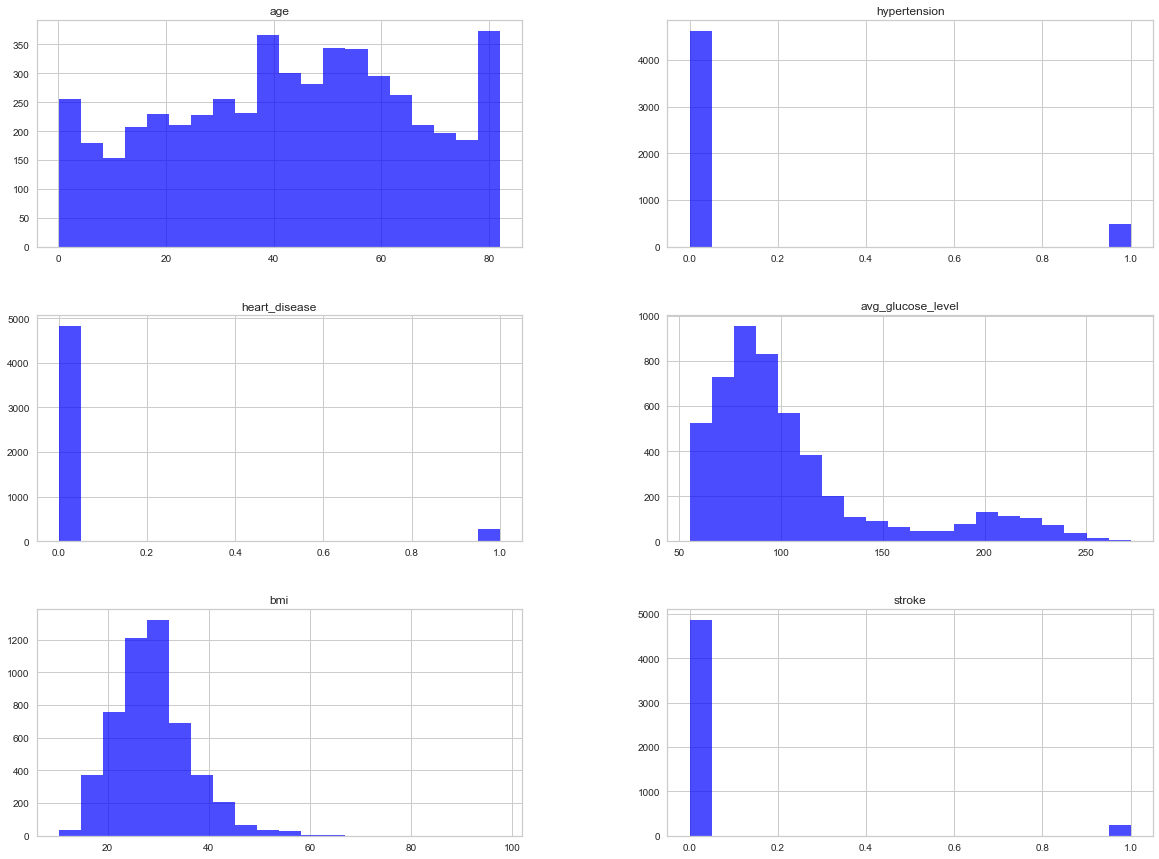

In [114]:
#histograma de todas as variáveis quantitativas
df.hist(bins=20, figsize=(20,15),color='blue',alpha=0.7)
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='age'>

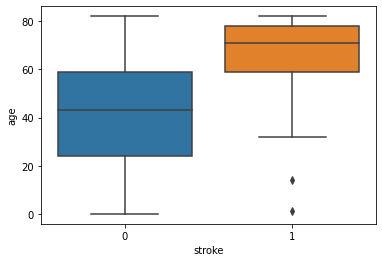

In [17]:
sns.boxplot(x = 'stroke', y = 'age', data = df)

📌 Nesse BoxPlot podemos ver que a classe `1` (quem teve AVC) possui em geral uma idade maior, com mediana próxima de 80 anos, já os da classe `0` (quem não teve AVC) tem uma mediana próxima de 40 anos.

## Análise de correlação

<AxesSubplot:>

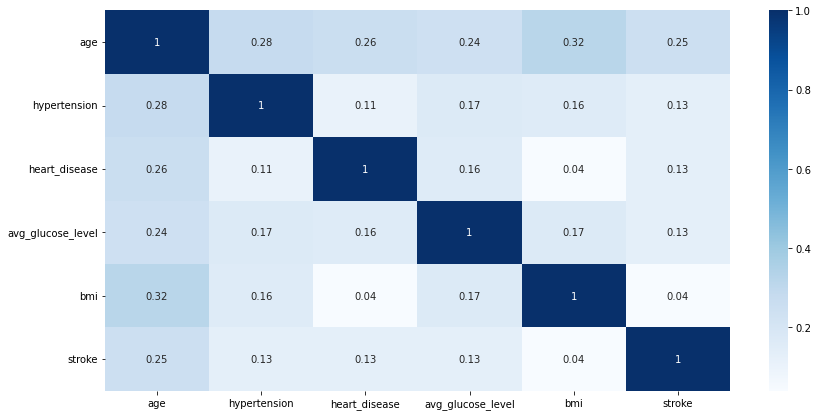

In [18]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

📌 Nesse mapa de calor podemos obsevar que não há nenhuma grande correlação entre nenhuma dessas variáveis quantitativas.

# Pré-processamento dos dados

1. Faremos o escalonamento das variáveis `age`, `avg_glucose_level` e `bmi`.
2. Dividiremos o conjunto de dados em dois, separando as variáveis explicativas da variável resposta.
3. Trataremos dos dados categoricos com o LabelEncoder, transformando-os em numéricos.
4. Utilizaremos o OneHotEncoder para otimizar os resultados do LabelEncoder.
5. Por fim, utilizaremos do SMOTE para realizar uma reamostragem para balancearmos os dados.



## Escalonamento

In [19]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['age', 'avg_glucose_level', 'bmi']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

## Divisão entre variáveis explicativas e variável resposta

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
x = df.iloc[:, 0:10].values

In [22]:
y = df.iloc[:, 10].values

In [23]:
x.shape

(5110, 10)

In [24]:
y.shape

(5110,)

## LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_ever_married = LabelEncoder()
label_encoder_work_type = LabelEncoder()
label_encoder_Residence_type = LabelEncoder()
label_encoder_smoking_status = LabelEncoder()

In [26]:
x[:, 0] = label_encoder_gender.fit_transform(x[:, 0])
x[:, 4] = label_encoder_ever_married.fit_transform(x[:, 4])
x[:, 5] = label_encoder_work_type.fit_transform(x[:, 5])
x[:, 6] = label_encoder_Residence_type.fit_transform(x[:, 6])
x[:, 9] = label_encoder_smoking_status.fit_transform(x[:, 9])

In [27]:
x.shape

(5110, 10)

In [28]:
y.shape

(5110,)

## OneHotEncoder

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
onehotencoder_x = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')

In [31]:
x = onehotencoder_x.fit_transform(x)

In [32]:
x.shape

(5110, 21)

## Balanceamento dos dados fazendo reamostragem com SMOTE

In [33]:
!pip -q install imblearn

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_resample, y_resample = smote.fit_resample(x, y)

In [35]:
np.unique(y_resample, return_counts = True)

(array([0, 1], dtype=int64), array([4861, 4861], dtype=int64))

📌 Após usarmos o SMOTE a variável resposta agora tem as mesma quantidade de observações para `0` (não teve AVC) e para `1` (teve AVC).

In [36]:
x_resample.shape

(9722, 21)

In [37]:
y_resample.shape

(9722,)

📌 E aqui podemos ver que o número de observações em geral aumentou por conta do SMOTE.

# Escolhendo os melhores parâmetros com GridSearchCV

## Bibliotecas necessárias

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Decision Tree

In [39]:
parametros = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

In [40]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_resample, y_resample)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.9229606355855999


## Random Forest

In [41]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 20, 50, 100],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20]}

In [42]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_resample, y_resample)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.964825552487649


## K-Nearest Neighbors (KNN)

In [43]:
parametros = {'weights': ['uniform', 'distance'],
              'n_neighbors': [2, 4, 8],
              'p': [1, 2, 5]}

In [44]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_resample, y_resample)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.9570050884932348


## Regressão Logística

In [45]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [47]:
import warnings

In [48]:
warnings.filterwarnings('ignore')

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_resample, y_resample)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.7821442021856189


## Suport Vector Machine (SVM)

In [49]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [50]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_resample, y_resample)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.8960093412464163


# Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score, KFold

In [65]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []

for i in range(30):
    
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  # decision tree  
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='best')
  scores = cross_val_score(arvore, x_resample, y_resample, cv = kfold)
  resultados_arvore.append(scores.mean())
    
  #random forest  
  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=2, n_estimators = 100)
  scores = cross_val_score(random_forest, x_resample, y_resample, cv = kfold)
  resultados_random_forest.append(scores.mean())
    
  #knn  
  knn = KNeighborsClassifier(n_neighbors = 2, p = 1, weights = 'distance')
  scores = cross_val_score(knn, x_resample, y_resample, cv = kfold)
  resultados_knn.append(scores.mean())
    
  #regressão logistica  
  logistica = LogisticRegression(C = 2.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, x_resample, y_resample, cv = kfold)
  resultados_logistica.append(scores.mean())

  #svm  
  svm = SVC(kernel = 'rbf', C = 2.0, tol = 0.001)
  scores = cross_val_score(svm, x_resample, y_resample, cv = kfold)
  resultados_svm.append(scores.mean())

In [66]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm})
resultados

,Arvore,Random forest,KNN,Logistica,SVM
0,0.928820,0.966263,0.963175,0.781320,0.899197
1,0.927176,0.966570,0.959883,0.781114,0.898990
2,0.927997,0.966365,0.962661,0.781630,0.899095
3,0.927894,0.965542,0.960914,0.781423,0.898374
4,0.929643,0.966159,0.961016,0.781424,0.899507
5,0.923678,0.966363,0.960603,0.780703,0.898578
6,0.927587,0.966982,0.961017,0.779779,0.897962
7,0.925119,0.966777,0.959780,0.781523,0.898272
8,0.923267,0.965131,0.960913,0.781426,0.898273
9,0.929645,0.965852,0.962765,0.781732,0.900227


In [67]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.927093,0.966392,0.961445,0.781475,0.898676
std,0.002616,0.001012,0.000894,0.000537,0.000695
min,0.922236,0.963278,0.959780,0.779779,0.896524
25%,0.925222,0.965877,0.961016,0.781243,0.898273
50%,0.927381,0.966468,0.961324,0.781474,0.898630
75%,0.928795,0.966880,0.961993,0.781707,0.898993
max,0.932318,0.968628,0.963279,0.782453,0.900227


📌 O modelo que apresentou a melhor media de todas as repetições realizadas foi o Random Forest, mas o KNN teve uma média bem próxima e um desvio padrão menor.

# Teste de normalidade dos dados com Shapiro-Wilk

In [68]:
from scipy.stats import shapiro

In [69]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm)

(ShapiroResult(statistic=0.9755504727363586, pvalue=0.6989489793777466),
 ShapiroResult(statistic=0.957554817199707, pvalue=0.2679007649421692),
 ShapiroResult(statistic=0.9672006964683533, pvalue=0.4656912386417389),
 ShapiroResult(statistic=0.9431373476982117, pvalue=0.11050885915756226),
 ShapiroResult(statistic=0.9356256723403931, pvalue=0.06938589364290237))

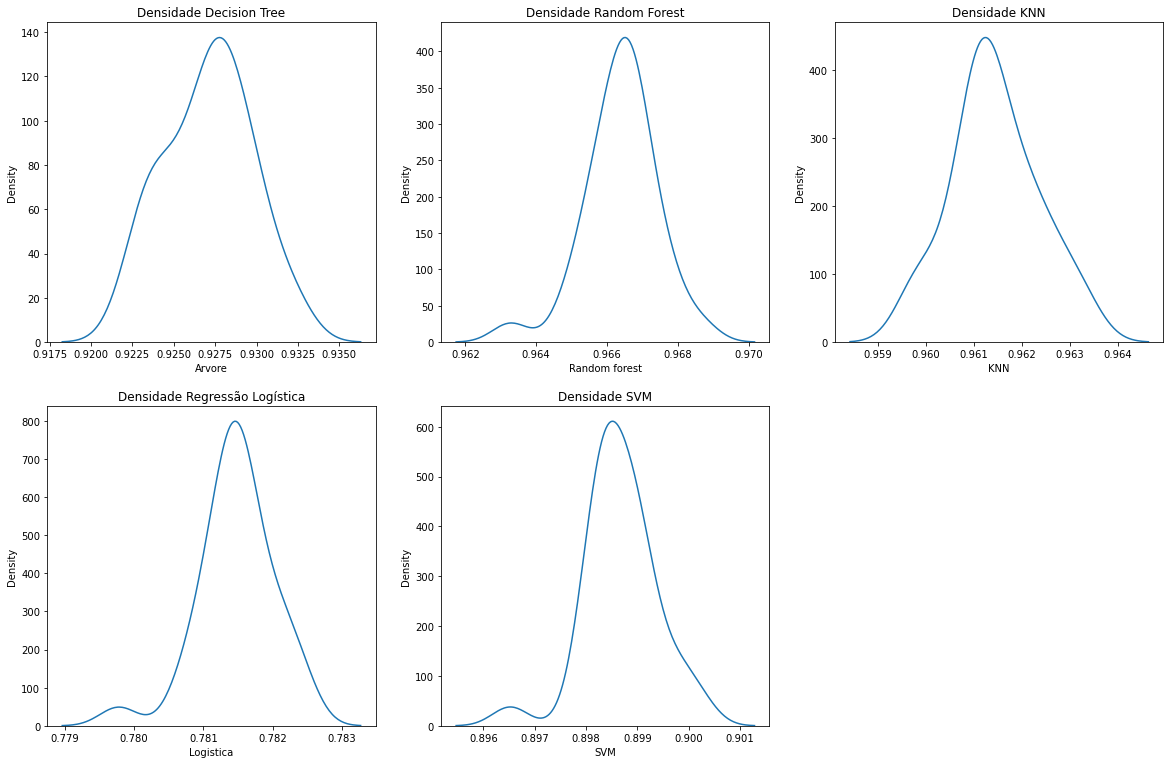

In [70]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax1.set_title('Densidade Decision Tree')
ax2.set_title('Densidade Random Forest')
ax3.set_title('Densidade KNN')
ax4.set_title('Densidade Regressão Logística')
ax5.set_title('Densidade SVM')



sns.kdeplot(resultados.iloc[:,0],ax=ax1)
sns.kdeplot(resultados.iloc[:,1],ax=ax2)
sns.kdeplot(resultados.iloc[:,2],ax=ax3)
sns.kdeplot(resultados.iloc[:,3],ax=ax4)
sns.kdeplot(resultados.iloc[:,4],ax=ax5);

📌 No teste de Shapiro-Wilk temos que a hipótese nula é que os dados seguem normalidade, dito isso, podemos afirmar que nós não rejeitamos a hipótese nula com 95% de confiança, pois todos os valores de `p` obtidos através do teste foram maiores que 0,05.

# Teste de hipótese com ANOVA e Tukey

In [72]:
from scipy.stats import f_oneway

In [73]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm']}

In [74]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.928820,arvore
1,0.927176,arvore
2,0.927997,arvore
3,0.927894,arvore
4,0.929643,arvore
...,...,...
145,0.898994,svm
146,0.898886,svm
147,0.897965,svm
148,0.898272,svm


In [76]:
from statsmodels.stats.multicomp import MultiComparison
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [77]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
       arvore           knn   0.0344 0.001  0.0334  0.0353   True
       arvore     logistica  -0.1456 0.001 -0.1466 -0.1446   True
       arvore random_forest   0.0393 0.001  0.0383  0.0403   True
       arvore           svm  -0.0284 0.001 -0.0294 -0.0274   True
          knn     logistica    -0.18 0.001 -0.1809  -0.179   True
          knn random_forest   0.0049 0.001   0.004  0.0059   True
          knn           svm  -0.0628 0.001 -0.0637 -0.0618   True
    logistica random_forest   0.1849 0.001  0.1839  0.1859   True
    logistica           svm   0.1172 0.001  0.1162  0.1182   True
random_forest           svm  -0.0677 0.001 -0.0687 -0.0667   True
-----------------------------------------------------------------


📌 De acordo com o teste Tukey, nenhum dos modelos obteve a média estatísticamente igual a de outro, ou seja, as médias dos resultados desses modelos diferem estatísticamente um do outro com 95% de confiança.

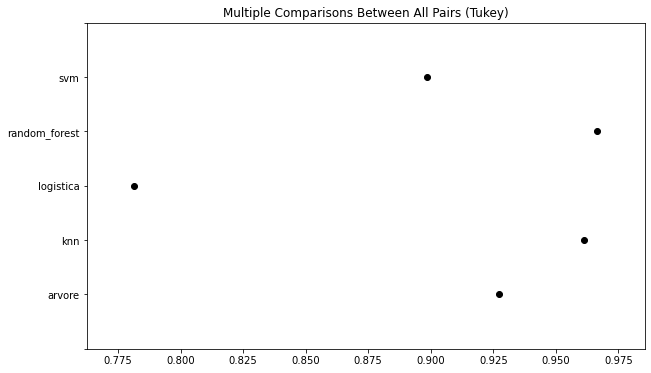

In [79]:
teste_estatistico.plot_simultaneous();

📌 Com base nas informações adquiridas acima, proseguiremos com o teste dos três melhores modelos, são eles:

- Decision Tree
- Random Forest
- KNN

# Teste dos modelos

## Bibliotecas necessárias

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

## Dividindo o banco de dados em treino e teste

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample, test_size=0.25, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7291, 21), (7291,), (2431, 21), (2431,))

## Aplicando o modelo Decision Tree

In [87]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='best', random_state = 1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [88]:
previsoes_dt = dt.predict(x_test)
previsoes_dt

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
accuracy_score(y_test, previsoes_dt)

0.9288358700123406

0.9288358700123406

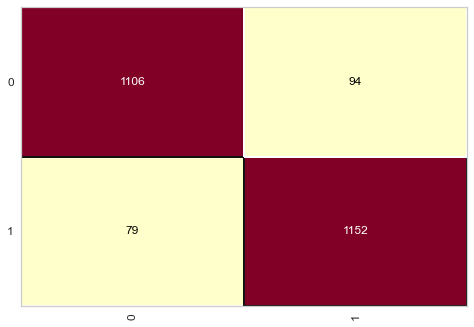

In [90]:
cm = ConfusionMatrix(dt)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [91]:
print(classification_report(y_test, previsoes_dt))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1200
           1       0.92      0.94      0.93      1231

    accuracy                           0.93      2431
   macro avg       0.93      0.93      0.93      2431
weighted avg       0.93      0.93      0.93      2431



📌 O modelo Decision Tree consegue prever quem não terá AVC em 92% dos casos e acerta 93% das vezes. Ele também consegue prever quem terá AVC em 94% dos casos e acerta 92% das vezes.

## Aplicando o modelo Random Forest

In [92]:
rf = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=2, n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [93]:
previsoes_rf = rf.predict(x_test)
previsoes_rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [94]:
accuracy_score(y_test, previsoes_rf)

0.9658576717400247

0.9658576717400247

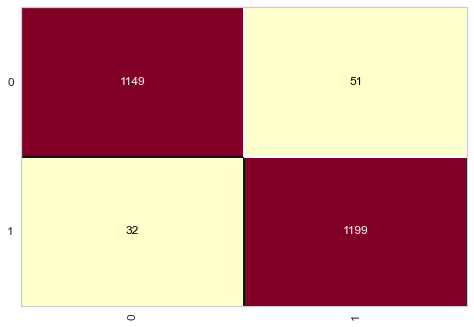

In [95]:
cm = ConfusionMatrix(rf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [104]:
print(classification_report(y_test, previsoes_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1200
           1       0.96      0.97      0.97      1231

    accuracy                           0.97      2431
   macro avg       0.97      0.97      0.97      2431
weighted avg       0.97      0.97      0.97      2431



📌 O modelo Decision Tree consegue prever quem não terá AVC em 96% dos casos e acerta 97% das vezes. Ele também consegue prever quem terá AVC em 97% dos casos e acerta 96% das vezes.

## Aplicando o modelo KNN

In [96]:
knn = KNeighborsClassifier(n_neighbors = 2, p = 1, weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

In [101]:
previsoes_knn = knn.predict(x_test)
previsoes_knn

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
accuracy_score(y_test, previsoes_knn)

0.9646236116824353

0.9646236116824353

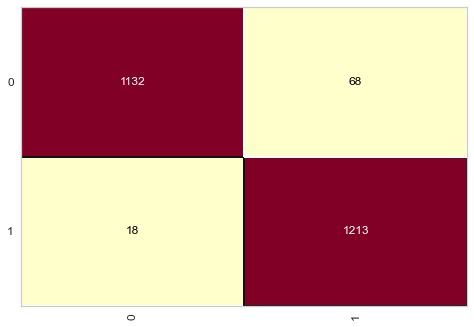

In [103]:
cm = ConfusionMatrix(knn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [105]:
print(classification_report(y_test, previsoes_knn))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1200
           1       0.95      0.99      0.97      1231

    accuracy                           0.96      2431
   macro avg       0.97      0.96      0.96      2431
weighted avg       0.97      0.96      0.96      2431



📌 O modelo Decision Tree consegue prever quem não terá AVC em 94% dos casos e acerta 98% das vezes. Ele também consegue prever quem terá AVC em 99% dos casos e acerta 95% das vezes.

# Conclusão

Os resultados mostram que os modelos de Random Forest e KNN conseguiram um ótimo desempenho, sendo que o Random Forest consegue ser melhor em classificar os pacientes que não terão AVC, enquanto o KNN conseguiu se sair melhor em classificar os pacientes que teriam AVC. Para selecionar o melhor modelo para pôr em produção precisariamos saber qual o mais importante, classificar melhor os que não terão AVC ou os que terão. Os dois modelos se saíram ótimos para classificar ambos, mas cada um foi um pouco melhor que o outro em algum aspecto.

Estou muito satisfeito com minha análise. Espero que também tenham gostado.

Obrigado!!!!!!!